In [15]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [16]:
# Step 2: Load dataset
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
df = pd.read_csv("adult.csv", names=columns, header=None)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.head()

C:\Users\ATUL AGRAHARI\AppData\Local\Temp\ipykernel_18316\4076019025.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [18]:
# Step 3: Clean data
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)  # Remove missing values
df.reset_index(drop=True, inplace=True)

In [19]:
# Step 4: Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

In [20]:
# Step 5: Split data into train/test
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Step 6: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Step 7: Make predictions
y_pred = model.predict(X_test)

Accuracy: 0.8519807724183657

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      4578
           1       0.72      0.62      0.67      1455

    accuracy                           0.85      6033
   macro avg       0.80      0.77      0.79      6033
weighted avg       0.85      0.85      0.85      6033



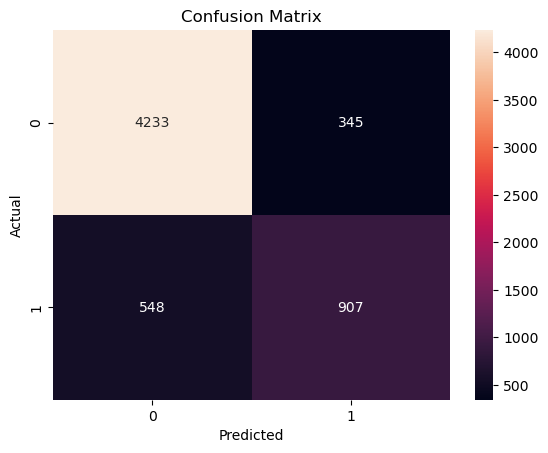

In [23]:
# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
import joblib

joblib.dump(model, "model.pkl")   # ✅ This is enough

['model.pkl']

In [28]:
encoder = {}
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoder[col] = le

# Save the model and encoder
joblib.dump(model, 'model.pkl')
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']